In [2]:
import os
if not os.path.exists("/home/featurize/data/anno.zip"):
    !featurize dataset download 757181ec-0841-4468-b701-54ea53ad2d3c
if not os.path.exists("/home/featurize/data/forgery_round1_train_20220217.zip"):
    !featurize dataset download e4dc9a7b-ded4-453d-b887-1f3fb04a5f94

100%|█████████████████████████████████████| 17.7k/17.7k [00:00<00:00, 4.48MiB/s]
🍬  下载完成，正在解压...
🏁  数据集已经成功添加
100%|████████████████████████████████████████| 329M/329M [00:02<00:00, 140MiB/s]
🍬  下载完成，正在解压...
🏁  数据集已经成功添加


In [196]:
import os
import cv2
import math
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/home/featurize/data/train.csv')
df['image_path'] = '/home/featurize/data/train/img/'
df['mask_path'] = f'/home/featurize/data/train/mask/'

In [23]:
df.head(2)

,image,ratio,fold,image_path,mask_path
0,146,1.1,0,/home/featurize/data/train/img/,/home/featurize/data/train/mask/
1,2168,7.0,0,/home/featurize/data/train/img/,/home/featurize/data/train/mask/


In [92]:
image_path = df.iloc[0]['image_path']
mask_path = df.iloc[0]['mask_path']
image = cv2.imread(os.path.join(image_path, str(df.iloc[0].image) + '.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread(os.path.join(image_path, str(df.iloc[1000].image) + '.jpg'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
mask = cv2.imread(os.path.join(mask_path, str(df.iloc[0].image) + '.png'), cv2.IMREAD_GRAYSCALE)

In [199]:
image = cv2.imread('VOCdevkit/VOC2007/JPEGImages/3998.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('VOCdevkit/VOC2007/JPEGImages/4000.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
mask = cv2.imread(('VOCdevkit/VOC2007/SegmentationClass/3998.jpg'), cv2.IMREAD_GRAYSCALE)# / 255

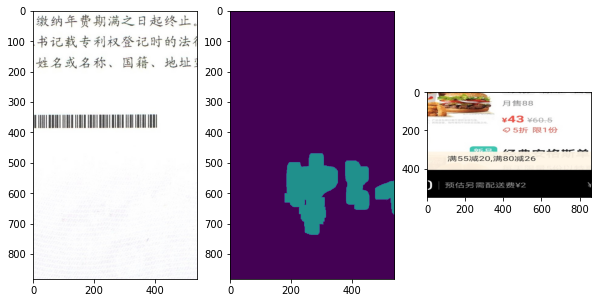

In [200]:
f, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(image)
ax[1].imshow(mask)
ax[2].imshow(image2)

In [221]:
mask_ = np.zeros(image.shape[:2], dtype="uint8")
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

# x0, y0 = (700,50)
# x1, y1 = (0,50)
# x2, y2 = (0,120)
# x3, y3 = (700,120)

x0, y0 = (random.randint(1,300),random.randint(1,300))
x1, y1 = (random.randint(1,300),random.randint(1,300))
x2, y2 = (random.randint(1,300),random.randint(1,300))
x3, y3 = (random.randint(1,300),random.randint(1,300))

# index = image_path.split('/')[-1].split('.')[0]

# mask[y1:y2, x1:x0] = 1

x_mid0, y_mid0 = int((x1 + x2) / 2), int((y1 + y2) / 2)
x_mid1, y_mi1 = int((x0 + x3) / 2), int((y0 + y3) / 2)

thickness = int(math.sqrt((x2 - x1)**2 + (y2 - y1)**2))

cv2.line(mask_, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
img = cv2.inpaint(image, mask_, 7, cv2.INPAINT_NS)
# img = cv2.rectangle(img, pt1=[x2,y1], pt2=[x3,y2], color=(255,0,0), thickness=3)

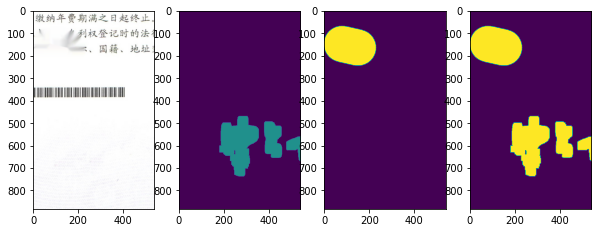

In [228]:
f, ax = plt.subplots(1,4, figsize=(10,10))
ax[0].imshow(img);
ax[1].imshow(mask);
ax[2].imshow(mask_);
aa = mask+mask_
aa[aa!=0]=1
ax[3].imshow(aa)

In [229]:
i = cv2.cvtColor(aa,cv2.COLOR_GRAY2RGB)

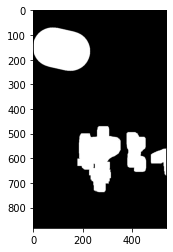

In [230]:
plt.imshow(i)

In [195]:
i[i==255]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)